<a href="https://colab.research.google.com/github/c26Weone/Dibete_prediction_accuracy/blob/main/Proteomics_Analysis_of_Serum_Proteins_in_Gestational_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Import pandas
import numpy as np #linear algebra
from scipy.stats import mode
import scipy as sc
import pandas as pd # For data processing
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns #Data Visualization
import sklearn

#loading packages for Logistic Regression
from sklearn.linear_model import LogisticRegression


#To Split our Data set into training and test data
from sklearn.model_selection import train_test_split

# To calculate accuracy measures and confusion matrix
from sklearn import metrics

from sklearn import linear_model

#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [3]:
diabete_data = pd.read_csv('/content/diabetes.csv')

In [8]:
diabete_data.head(768)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
diabete_data.shape

(768, 9)

In [9]:
#columns in the dataset 
diabete_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
diabete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
#Checking for missing and null values in each column
## a number And also find if there are any columns with 
# null/missing values
print(diabete_data[~diabete_data.applymap(np.isreal).all(1)])
null_columns=diabete_data.columns[diabete_data.isnull().any()]
print(diabete_data.isnull().any(axis=1)[null_columns].head())

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Series([], dtype: bool)


In [14]:
#Summary of the Dataset 
diabete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [15]:
# Finding the zero values in the columns

(diabete_data == 0).sum(axis=0)
# We can see that Insulin highest number of zero values

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [16]:
#We will use 'median' to replace 0 for all columns except for 'Insulin' as diff between mean and median is too much
diabete_data['Pregnancies'].replace(0,diabete_data['Pregnancies'].median(),inplace=True)
diabete_data['Glucose'].replace(0,diabete_data['Glucose'].median(),inplace=True)
diabete_data['BloodPressure'].replace(0,diabete_data['BloodPressure'].median(),inplace=True)
diabete_data['SkinThickness'].replace(0,diabete_data['SkinThickness'].median(),inplace=True)
diabete_data['BMI'].replace(0,diabete_data['BMI'].median(),inplace=True)
diabete_data['Insulin'].replace(0,diabete_data['Insulin'].mean(),inplace=True)

In [17]:
#Checking again if all the zero values are replaced
(diabete_data == 0).sum(axis=0)
# The result shows that zero values are now replaced

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [18]:
# Checking the data distribution for the target variable 'Outcome' against other variables in the dataset
diabete_data.groupby(['Outcome']).count()

# The ratio is almost 1:2 in favor of class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


# DATA **VISUALIZATION**

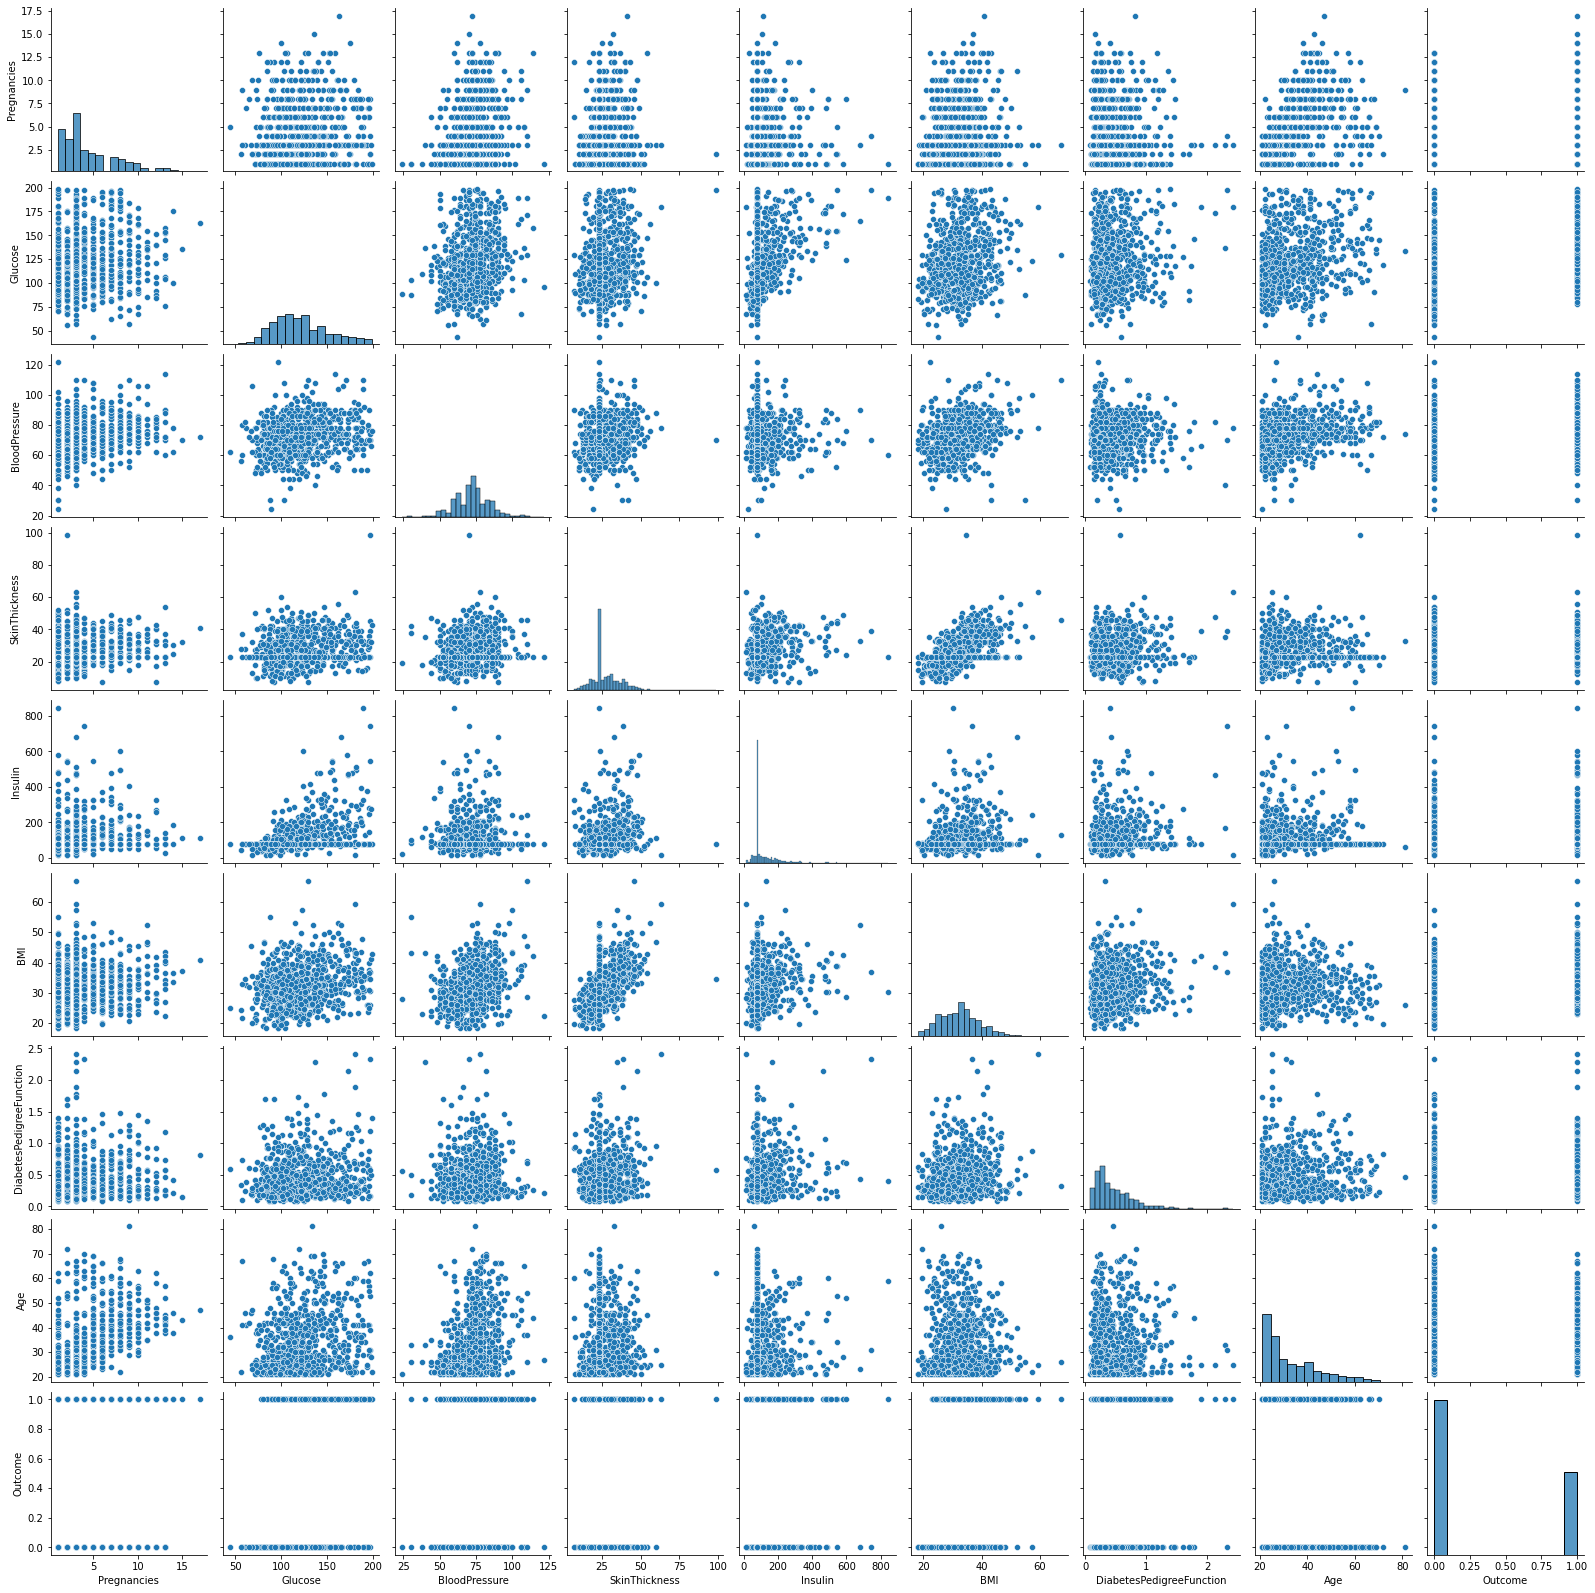

In [19]:
# Pairplot using sns

sns.pairplot(diabete_data)

In [20]:
#Checking corelation between the columns
diabete_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.017330,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.397017,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,0.006385,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.217854,0.546951,0.142977,0.054514,0.189065
Insulin,-0.017330,0.397017,0.006385,0.217854,1.000000,0.189850,0.157806,0.038652,0.179185
BMI,0.080540,0.231400,0.281132,0.546951,0.189850,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.157806,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,0.038652,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.179185,0.312249,0.173844,0.238356,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


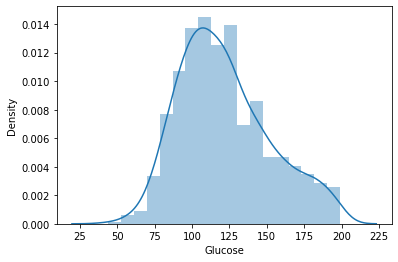

In [23]:
# Data for BMI, Glucose and BloodPressure has normal distribution
sns.distplot(diabete_data['Glucose'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


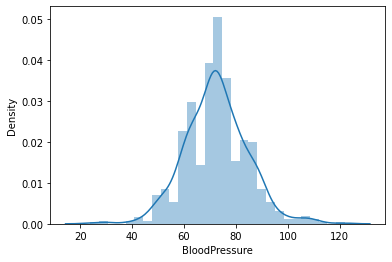

In [28]:
sns.distplot(diabete_data['BloodPressure'],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


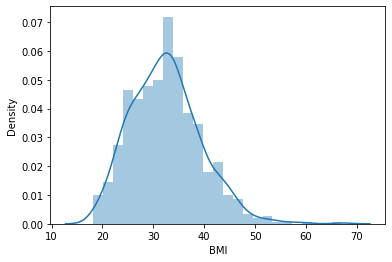

In [29]:
sns.distplot(diabete_data['BMI'],kde=True)

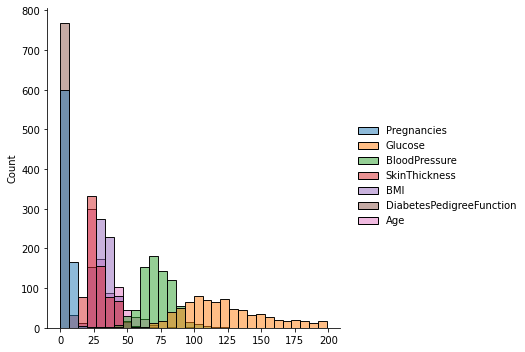

In [33]:
#Checking the outliers for the columns exlcuding 'Insulin'
sns.displot(data=diabete_data.drop(['Insulin','Outcome'],axis=1))

# LOGISTIC MODEL using **SKlearn**

In [59]:
#Model prediction 
# Seperating the target variable and predictors
x=diabete_data.drop('Outcome',axis=1)
y=diabete_data['Outcome']

#Splitting the dataset into training and testing 
#For training the ratio is 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)
type(x_train)

model=LogisticRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
model_score=model.score(x_test,y_test)
print('Accuracy = ',model_score,'\n')

Accuracy =  0.7727272727272727 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [39]:
#Model prediction 
# Seperating the target variable and predictors
X = diabete_data.drop(['Outcome'], axis = 1)

# “Yes”, “No” for diabetes(Dependent variable)
Y = diabete_data.loc[:,"Outcome"].values

# Splitting the data into ratio of 70:30 training and test data set
test_size = 0.20
# Random number seeding for reapeatability of the code
seed =1
#Splitting Data into train-test where 70% will be used for training #and rest 30% for Testing our model built on test data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [41]:
logreg = linear_model.LogisticRegression(max_iter=200)
# Fit the mode 
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [42]:
# Predict
predicted = logreg.predict(X_test)

In [43]:
#Checking the accuracy
print("Test accuracy: {} ".format(logreg.score(X_test, y_test)))

Test accuracy: 0.7727272727272727 


In [45]:
#confusing matrix 
cf_matrix = confusion_matrix(y_test,predicted)
cf_matrix

array([[88, 11],
       [24, 31]])

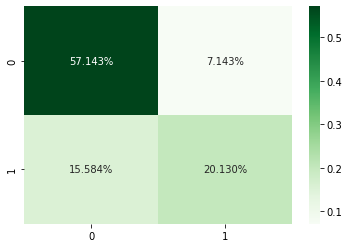

In [52]:
#Plot for the confusion matrix
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.3%', cmap='Greens')
plt.show()